<a href="https://colab.research.google.com/github/sharanya-chs/SCT_ML_1/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


Test metrics
MAE : 35,788.06
MSE : 2,806,426,667.25
RMSE: 52,975.72
R^2 : 0.6341

     feature   coefficient
   GrLivArea    104.026307
BedroomAbvGr -26655.165357
    FullBath  30014.324109

Intercept: 52,261.75


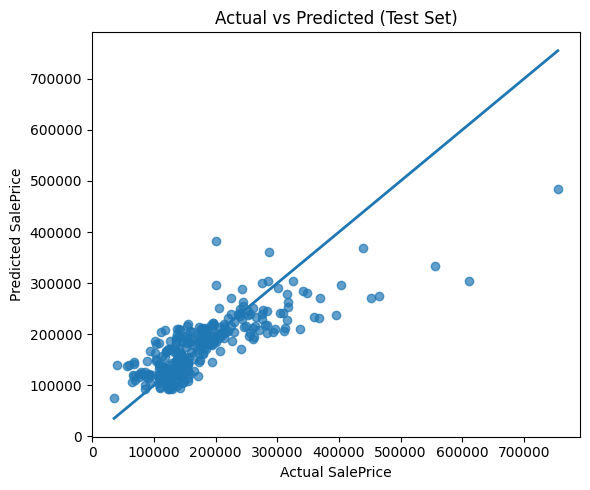

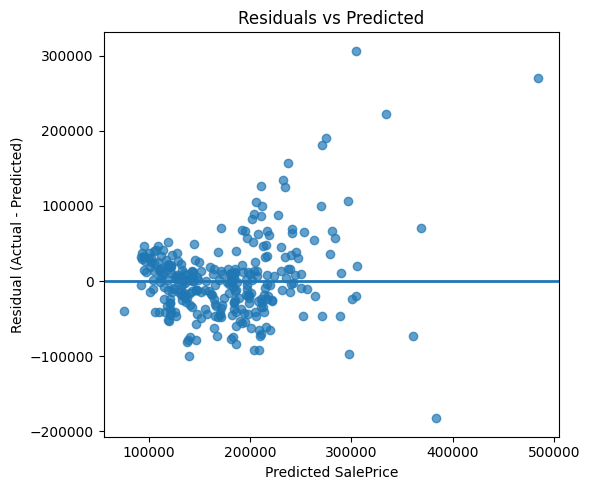

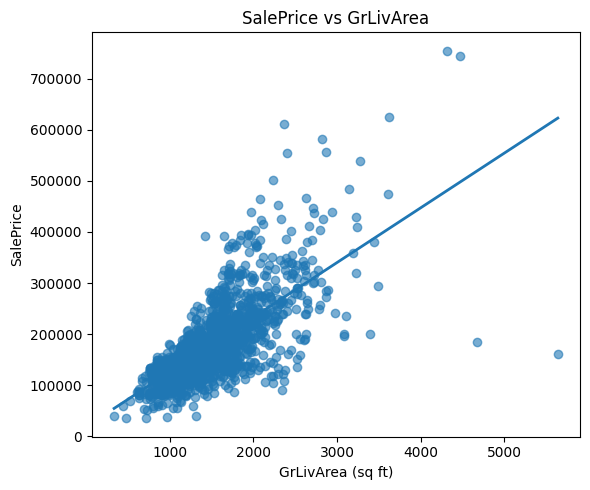

Saved: house_price_linear_regression.pkl, model_features.pkl


In [3]:
# ==== House Prices: simple linear regression (Colab-ready, no bad kwargs) ====
import os, io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# 1) Load train.csv. If not found locally, ask for upload.
csv_path = "train.csv"
if not os.path.exists(csv_path):
    try:
        from google.colab import files
        uploaded = files.upload()  # choose the Kaggle train.csv
        # pick the first CSV uploaded
        csv_path = next((name for name in uploaded.keys() if name.lower().endswith(".csv")), None)
        if csv_path is None:
            raise FileNotFoundError("Please upload train.csv")
    except Exception as e:
        raise FileNotFoundError("train.csv not found. Upload it when prompted.") from e

df = pd.read_csv(csv_path)

# 2) Keep only the columns required by your task
required = ["SalePrice", "GrLivArea", "BedroomAbvGr", "FullBath"]
missing = [c for c in required if c not in df.columns]
if missing:
    raise ValueError(f"This is not the Kaggle House Prices train.csv. Missing columns: {missing}")

df = df[required].dropna().reset_index(drop=True)

X = df[["GrLivArea", "BedroomAbvGr", "FullBath"]]
y = df["SalePrice"]

# 3) Train/test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# 4) Predictions & metrics (no unsupported kwargs)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)                 # RMSE computed from MSE for full compatibility
r2 = r2_score(y_test, y_pred)       # <-- do NOT pass 'squared' here

print("Test metrics")
print(f"MAE : {mae:,.2f}")
print(f"MSE : {mse:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R^2 : {r2:.4f}\n")

coef = pd.DataFrame({"feature": X.columns, "coefficient": model.coef_})
print(coef.to_string(index=False))
print(f"\nIntercept: {model.intercept_:,.2f}")

# 5) Plots (matplotlib, one per figure)
# A) Actual vs Predicted
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.7)
min_v = float(min(y_test.min(), y_pred.min()))
max_v = float(max(y_test.max(), y_pred.max()))
plt.plot([min_v, max_v], [min_v, max_v], linewidth=2)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted (Test Set)")
plt.tight_layout()
plt.show()

# B) Residuals vs Predicted
residuals = y_test - y_pred
plt.figure(figsize=(6,5))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, linewidth=2)
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.tight_layout()
plt.show()

# C) SalePrice vs GrLivArea with simple fitted line (all data)
plt.figure(figsize=(6,5))
plt.scatter(X["GrLivArea"], y, alpha=0.6)
m, b = np.polyfit(X["GrLivArea"], y, 1)
xline = np.linspace(X["GrLivArea"].min(), X["GrLivArea"].max(), 200)
plt.plot(xline, m*xline + b, linewidth=2)
plt.xlabel("GrLivArea (sq ft)")
plt.ylabel("SalePrice")
plt.title("SalePrice vs GrLivArea")
plt.tight_layout()
plt.show()

# 6) Save model & features
joblib.dump(model, "house_price_linear_regression.pkl")
joblib.dump(list(X.columns), "model_features.pkl")
print("Saved: house_price_linear_regression.pkl, model_features.pkl")

In [4]:
import joblib
import pandas as pd

# Load model & features
model = joblib.load("house_price_linear_regression.pkl")
features = joblib.load("model_features.pkl")

# Example new house
new_house = pd.DataFrame([{
    "GrLivArea": 1800,
    "BedroomAbvGr": 3,
    "FullBath": 2
}])

predicted_price = model.predict(new_house[features])
print("Predicted Price:", predicted_price[0])

Predicted Price: 219572.25339490993
